<a href="https://colab.research.google.com/github/juliuserbach/Semantic-Features/blob/master/Mask_R_CNN_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/ftaubner/semantic_features_detection.git

Cloning into 'semantic_features_detection'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1400 (delta 3), reused 8 (delta 3), pack-reused 1392
Receiving objects: 100% (1400/1400), 113.86 MiB | 29.32 MiB/s, done.
Resolving deltas: 100% (855/855), done.


In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100024&authkey=ADLJzehr2ENRggw" -O mapillary_vistas.zip

--2020-04-12 08:09:32--  https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100024&authkey=ADLJzehr2ENRggw
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kshtya.am.files.1drv.com/y4mculR4kQPwAoVYw9vGHYi3G3SrjTItsEn-2VMpSDox-6jLXG9ZvUpjBfzfuVQkF8O9drqxgKDpiXuIH6waiOB3it2YcYE3bcr-zLSZVZRjypI9G58BL1fX0ZB8iR_1PWcB2G94Qw7V3x3jwVVutmgn5guoACwgJSosIJPUs1oBIAL9YdY53QqepAolRQfdSP0-88_r6VtNS2B17r6nc6Unw/mapillary_vistas_instance_mapping.zip?download&psid=1 [following]
--2020-04-12 08:09:32--  https://kshtya.am.files.1drv.com/y4mculR4kQPwAoVYw9vGHYi3G3SrjTItsEn-2VMpSDox-6jLXG9ZvUpjBfzfuVQkF8O9drqxgKDpiXuIH6waiOB3it2YcYE3bcr-zLSZVZRjypI9G58BL1fX0ZB8iR_1PWcB2G94Qw7V3x3jwVVutmgn5guoACwgJSosIJPUs1oBIAL9YdY53QqepAolRQfdSP0-88_r6VtNS2B17r6nc6Unw/mapillary_vistas_instance_mapping.zip?download&psid=1
Resolvin

In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100479&authkey=AJdjSPnfz5shCvk" -O mapillary_47.h5

--2020-04-12 08:40:09--  https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100479&authkey=AJdjSPnfz5shCvk
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://qyvpsa.am.files.1drv.com/y4m5RfdAugwdFVQ36U7RkLpv28OtERib33FTJUmdWuli82R-4K3RWg30UUm1IKxEs4XWPazHYLSHdb7ThLCKdbVqANtwz2kSoFamr5TTloqJlz0f7XzhSpyqoA7DIhlppgV0CFKNAfjvIzjsW0QJgGa_EKmqfagg3vSuw01Z4BbkXAGoHHPOGeDdtOgVAIj3v0izNXHthy_ZjrQxVHQLiA_sA/mask_rcnn_mapvistas_0047.h5?download&psid=1 [following]
--2020-04-12 08:40:10--  https://qyvpsa.am.files.1drv.com/y4m5RfdAugwdFVQ36U7RkLpv28OtERib33FTJUmdWuli82R-4K3RWg30UUm1IKxEs4XWPazHYLSHdb7ThLCKdbVqANtwz2kSoFamr5TTloqJlz0f7XzhSpyqoA7DIhlppgV0CFKNAfjvIzjsW0QJgGa_EKmqfagg3vSuw01Z4BbkXAGoHHPOGeDdtOgVAIj3v0izNXHthy_ZjrQxVHQLiA_sA/mask_rcnn_mapvistas_0047.h5?download&psid=1
Resolving qyvpsa.am.files.1d

In [0]:
!unzip -qq /content/mapillary_vistas.zip 'mapillary_vistas/validation/*' -d /content

In [0]:
!unzip -qq /content/mapillary_vistas.zip 'mapillary_vistas/config.json' -d /content

In [0]:
!pip install imgaug
!pip install Cython
!pip install pycocotools

In [0]:
import os
os.chdir('/content/semantic_features_detection/Notebook')

In [0]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
import imageio
%tensorflow_version 1.x
import tensorflow as tf


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Ignore Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
print(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/mapillary/"))  # To find local version
import mapillary

%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print(MODEL_DIR)

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
print('finished')

TensorFlow 1.x selected.
/content/semantic_features_detection
/content/semantic_features_detection/logs
finished


Using TensorFlow backend.


In [0]:
class_names= ['Unlabeled', 'Bird', 'Ground Animal', 'Curb', 'Fence', 'Guard Rail', 
              'Barrier', 'Wall', 'Bike Lane', 'Crosswalk - Plain', 'Curb Cut', 'Parking', 
              'Pedestrian Area', 'Rail Track', 'Road', 'Service Lane', 'Sidewalk', 'Bridge', 
              'Building', 'Tunnel', 'Person', 'Bicyclist', 'Motorcyclist', 'Other Rider', 
              'Lane Marking - Crosswalk', 'Lane Marking - General', 'Mountain', 'Sand', 
              'Sky', 'Snow', 'Terrain', 'Vegetation', 'Water', 'Banner', 'Bench', 'Bike Rack',
              'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox',
              'Manhole', 'Phone Booth', 'Pothole', 'Street Light', 'Pole', 'Traffic Sign Frame', 
              'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)',
              'Trash Can', 'Bicycle', 'Boat', 'Bus', 'Car', 'Caravan', 'Motorcycle', 'On Rails',
              'Other Vehicle', 'Trailer', 'Truck', 'Wheeled Slow', 'Car Mount', 'Ego Vehicle']
selected_classes = [34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52]

print(selected_classes)

[34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52]


In [0]:
# TRAIN_DIR = '/content/mapillary_vistas'
# # Training dataset
# dataset_train = mapillary.MapillaryDataset()
# dataset_train.load_vistas(dataset_dir=TRAIN_DIR, subset='training', class_ids=selected_classes)
# dataset_train.prepare()

# Validation dataset
VAL_DIR = '/content/mapillary_vistas'

dataset_val = mapillary.MapillaryDataset()
dataset_val.load_vistas(dataset_dir=VAL_DIR, subset='validation', class_ids=selected_classes)
dataset_val.prepare()

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


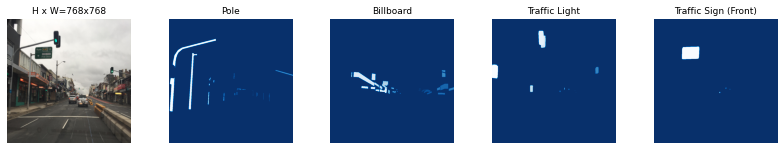

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


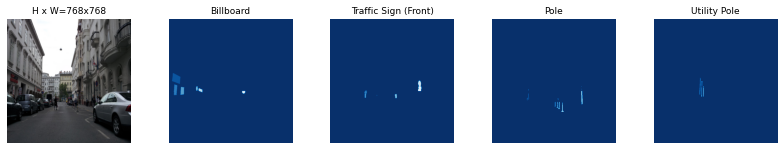

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


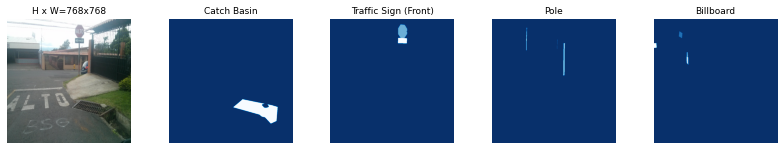

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


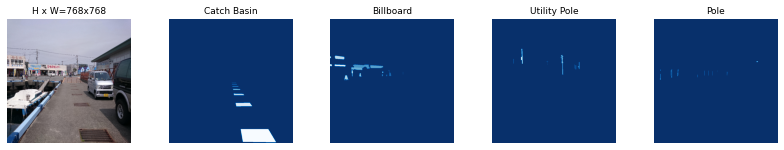

In [0]:
image_ids = np.random.choice(dataset_val.image_ids, 4)
for image_id in image_ids:
    image = dataset_val.load_image(image_id)
    print(dataset_val.class_names)
    mask, class_ids = dataset_val.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_val.class_names[1:])

In [0]:
class InferenceConfig(mapillary.mapvistas):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0
    NUM_CLASSES = len(selected_classes) + 1
config = InferenceConfig()
config.display()
batch_size = config.BATCH_SIZE


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                30
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

In [0]:
# Create model in training mode
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)
model_path = '/content/mapillary_47.h5'
model.load_weights(model_path, by_name=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [0]:
# def compute_batch_ap(image_ids):
#     APs = []
#     for image_id in image_ids:
#         # Load image
#         image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#             modellib.load_image_gt(dataset_val, config,
#                                    image_id, use_mini_mask=False)
#         # Run object detection
#         results = model.detect([image], verbose=0)
#         # Compute AP
#         r = results[0]
#         AP, precisions, recalls, overlaps =\
#             utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
#                               r['rois'], r['class_ids'], r['scores'], r['masks'])
#         APs.append(AP)
#     return APs

In [0]:
# image_ids = np.random.choice(dataset_val.image_ids, 300)
# APs = compute_batch_ap(image_ids)
# print("mAP @ IoU=50: ", np.mean(APs))

KeyboardInterrupt: ignored

In [0]:
def compute_batch_ap_classwise(image_ids):
    mAPs = np.zeros([len(selected_classes)])
    numAPs = np.zeros([len(selected_classes)])
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset_val, config,
                                  image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        # visualize.display_instances(image, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], class_names=dataset_val.class_names[1:], scores=r['scores'])
        # visualize.display_instances(image, boxes=gt_bbox, masks=gt_mask, class_ids=gt_class_id, class_names=dataset_val.class_names[1:])

        for i, class_id in enumerate(range(17)):
            # Select one class
            mask = np.where(gt_class_id == class_id, True, False)
            gt_class_id_sel = gt_class_id[mask]

            gt_bbox_sel = gt_bbox[mask,:]
            gt_mask_sel = gt_mask[:,:,mask]
                            
            # Select one class
            mask = np.where(r['class_ids'] == class_id, True, False)
            r_rois_sel = r['rois'][mask,:]
            r_class_ids_sel = r['class_ids'][mask]
            r_scores_sel = r['scores'][mask]
            r_masks_sel = r['masks'][:,:,mask] 
            if len(gt_class_id_sel) != 0:
                AP, precisions, recalls, overlaps =\
                    utils.compute_ap(gt_bbox_sel, gt_class_id_sel, gt_mask_sel,
                                      r_rois_sel, r_class_ids_sel, r_scores_sel, r_masks_sel)
                print("precisions: {}".format(precisions))
                mAPs[i] = mAPs[i] + AP
                # print("mAPs: {}".format(mAPs))
                numAPs[i] += 1
                # print("numAPs: {}".format(numAPs))

    # print("mAPs: {}".format(mAPs))
    # print("numAPs: {}".format(numAPs))
    mAPs = mAPs / numAPs
    return mAPs

In [0]:
image_ids = np.random.choice(dataset_val.image_ids,2)
# image_ids = [50]
APs = compute_batch_ap_classwise(image_ids)
print("mAP @ IoU=50: ", APs)

precisions: [1.  1.  0.5 0. ]
precisions: [1.  1.  0.5 0. ]
precisions: [0.5        0.5        0.5        0.5        0.5        0.4
 0.33333333 0.        ]
precisions: [0. 0.]
precisions: [0.33333333 0.33333333 0.33333333 0.33333333 0.25       0.2
 0.16666667 0.14285714 0.125      0.11111111 0.        ]
precisions: [1.         1.         0.5        0.33333333 0.25       0.2
 0.        ]
precisions: [1. 1. 0.]
precisions: [0. 0. 0.]
precisions: [0. 0. 0.]
precisions: [1. 1. 0.]
mAP @ IoU=50:  [       nan 0.0625            nan        nan        nan 0.
        nan        nan        nan        nan 0.25925926        nan
 0.06666667 0.16666667 0.         0.25       1.        ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


In [0]:
def compute_batch_ap_classwise_thresh(image_ids, class_id, thresh):
    mPs = 0
    numPs = 0
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset_val, config,
                                  image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        # visualize.display_instances(image, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], class_names=dataset_val.class_names[1:], scores=r['scores'])
        # visualize.display_instances(image, boxes=gt_bbox, masks=gt_mask, class_ids=gt_class_id, class_names=dataset_val.class_names[1:])

    
        # Select one class
        mask = np.where(gt_class_id == class_id, True, False)
        gt_class_id_sel = gt_class_id[mask]

        gt_bbox_sel = gt_bbox[mask,:]
        gt_mask_sel = gt_mask[:,:,mask]
                        
        # Select class and scores higher than threshold
        mask = np.where(np.logical_and(r['class_ids'] == class_id, r['scores'] > thresh), True, False)
        r_rois_sel = r['rois'][mask,:]
        r_class_ids_sel = r['class_ids'][mask]
        r_scores_sel = r['scores'][mask]
        r_masks_sel = r['masks'][:,:,mask] 
        if len(r_class_ids_sel) != 0:
            AP, precisions, recalls, overlaps =\
                utils.compute_ap(gt_bbox_sel, gt_class_id_sel, gt_mask_sel,
                                  r_rois_sel, r_class_ids_sel, r_scores_sel, r_masks_sel)
            mPs = mPs + precisions[-2]
            numPs += 1

    print("numPs: {}".format(numPs))
    mPs = mPs / numPs
    return mPs

In [0]:
mAP_opt = 0
thresh_opt = 0
class_id = 9
image_ids = np.random.choice(dataset_val.image_ids,500)

for thresh in range(20):
    thresh = thresh/20
    mAP = compute_batch_ap_classwise_thresh(image_ids, class_id, thresh)
    print(mAP)
    print(thresh)
    if mAP > mAP_opt:
        mAP_opt = mAP
        thresh_opt = thresh

/content/semantic_features_detection/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


In [0]:
print(mAP_opt)
print(thresh_opt)

0.09761124285445973
0.0


In [0]:
SAVE_DIR = '/content/Results'
image_ids = np.random.choice(dataset_val.image_ids,4)
for image_id in image_ids:
    image = dataset_val.load_image(image_id)
    results = model.detect([image], verbose=0)
    r = results[0]
    visualize.save_image(image = image[:,:,::-1], image_name=image_id, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], class_names=class_names, scores=r['scores'], save_dir=SAVE_DIR)

In [0]:
class_names = ['Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox',
               'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole',
               'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']
print(dataset_val.class_names[1:])

['Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


In [0]:
for i in range(len(APs)):
    print("class name: {}: mAP: {}".format(class_names[i], APs[i]))


class name: Bench: mAP: nan
class name: Billboard: mAP: 0.13378898509652173
class name: Catch Basin: mAP: 0.08723088352212927
class name: CCTV Camera: mAP: 0.009009009009009009
class name: Fire Hydrant: mAP: 0.05945945945945946
class name: Junction Box: mAP: 0.018995633194279982
class name: Mailbox: mAP: 0.0
class name: Manhole: mAP: 0.1898932374137172
class name: Phone Booth: mAP: 0.0
class name: Street Light: mAP: 0.16076993966647124
class name: Pole: mAP: 0.07435044233169
class name: Traffic Sign Frame: mAP: 0.0
class name: Utility Pole: mAP: 0.10728754850566499
class name: Traffic Light: mAP: 0.22378939301032894
class name: Traffic Sign (Back): mAP: 0.06839771660148428
class name: Traffic Sign (Front): mAP: 0.24776525653562692
class name: Trash Can: mAP: 0.06402141058740836
